In [1]:
# author: 0712238, Yan-Tong Lin
# date: 2020/5/27
# usage: Spectral Drawing for LA 2020 spring, MS Kang - HW10 problem 3 and 4(generalized for any 2/3D poltting of adj matrix)
# expected input: adj matrix(any size)
# reference: matplotlib official doc 

In [2]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
A1 = np.asarray([
    [0,1,0,0,1],
    [1,0,1,0,1],
    [0,1,0,1,0],
    [0,0,1,0,1],
    [1,1,0,1,0]
])

In [4]:
D1 = np.diag(np.sum(A1, axis=1))
D1

array([[2, 0, 0, 0, 0],
       [0, 3, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 3]])

In [5]:
L1 = D1-A1
L1

array([[ 2, -1,  0,  0, -1],
       [-1,  3, -1,  0, -1],
       [ 0, -1,  2, -1,  0],
       [ 0,  0, -1,  2, -1],
       [-1, -1,  0, -1,  3]])

In [6]:
def spectral_draw(A, d=2):
    A = A
    D = np.diag(np.sum(A, axis=1))
    L = D-A
    E = np.linalg.eig(L)
    # print("np eig\n", E[0], "\n", E[1])
    Ez = list(zip(E[0], E[1].T)) # should use E[1].T 
    Ez.sort(key=lambda x: x[0]) 
    # print(Ez)
    eps = 1e-10
    cc = 0
    # print(eps)
    idx = 0
    while(Ez[idx][0] < eps):
        idx += 1
    # now idx = first non=zero
    basis = []
    for i in range(d):
        print("take eigenvalue ", Ez[idx+i][0], "\neigen vector\n", Ez[idx+i][1])
        basis.append(Ez[idx+i][1])
    basis = np.asarray(basis)
    # print(basis)
    if(d == 2):
        plt.scatter(basis[0,:], basis[1,:])
        n = A.shape[0]
        for i in range(n):
            for j in range(i+1, n):
                if(A[i][j]):
                    x = np.linspace(basis[0][i], basis[0][j], 100)
                    y = np.linspace(basis[1][i], basis[1][j], 100)
                    plt.plot(x,y)
        plt.show()
    elif(d == 3):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        n = A.shape[0]
        for i in range(n):
            for j in range(i+1, n):
                if(A[i][j]):
                    x = np.linspace(basis[0][i], basis[0][j], 100)
                    y = np.linspace(basis[1][i], basis[1][j], 100)
                    z = np.linspace(basis[2][i], basis[2][j], 100)
                    ax.plot(x,y, z)
        ax.scatter(basis[0,:], basis[1,:], basis[2, :])
        plt.show()
        
        

take eigenvalue  1.3819660112501044 
eigen vector
 [ 0.63245553  0.19543951 -0.51166727 -0.51166727  0.19543951]
take eigenvalue  2.3819660112501047 
eigen vector
 [ 4.00680126e-16 -3.71748034e-01 -6.01500955e-01  6.01500955e-01
  3.71748034e-01]


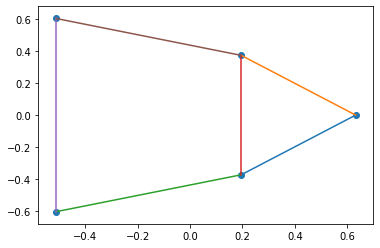

In [7]:
spectral_draw(A1, 2)

take eigenvalue  1.3819660112501044 
eigen vector
 [ 0.63245553  0.19543951 -0.51166727 -0.51166727  0.19543951]
take eigenvalue  2.3819660112501047 
eigen vector
 [ 4.00680126e-16 -3.71748034e-01 -6.01500955e-01  6.01500955e-01
  3.71748034e-01]
take eigenvalue  3.6180339887498927 
eigen vector
 [-0.63245553  0.51166727 -0.19543951 -0.19543951  0.51166727]


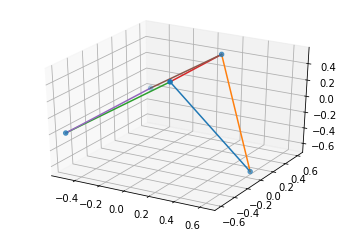

In [8]:
spectral_draw(A1, 3)

In [9]:
CubeA = np.zeros([8,8])
CubeE = [(1,2), (2,3), (3,4), (4,1), (1,5), (2,6), (3, 7), (4, 8), (5,6), (6, 7), (7, 8), (8, 5)]
for e in CubeE:
    CubeA[e[0]-1][e[1]-1] = CubeA[e[1]-1][e[0]-1] = 1
CubeA

array([[0., 1., 0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 1., 0., 1., 0.]])

take eigenvalue  1.9999999999999993 
eigen vector
 [ 0.08909207  0.53583229  0.45267116  0.00593094 -0.45267116 -0.00593094
 -0.08909207 -0.53583229]
take eigenvalue  1.9999999999999998 
eigen vector
 [-0.24771576  0.04281661 -0.29891795 -0.58945033  0.29891795  0.58945033
  0.24771576 -0.04281661]


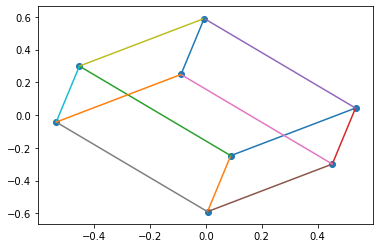

In [10]:
spectral_draw(CubeA, 2)

take eigenvalue  1.9999999999999993 
eigen vector
 [ 0.08909207  0.53583229  0.45267116  0.00593094 -0.45267116 -0.00593094
 -0.08909207 -0.53583229]
take eigenvalue  1.9999999999999998 
eigen vector
 [-0.24771576  0.04281661 -0.29891795 -0.58945033  0.29891795  0.58945033
  0.24771576 -0.04281661]
take eigenvalue  2.000000000000001 
eigen vector
 [ 0.61237244  0.20412415 -0.20412415  0.20412415  0.20412415 -0.20412415
 -0.61237244 -0.20412415]


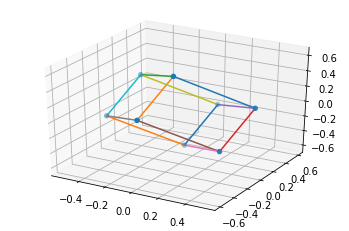

In [11]:
spectral_draw(CubeA, 3)